# everywhereml.data.preprocessing.Fourier

`Fourier` implements the [Fourier Transform](https://en.wikipedia.org/wiki/Fourier_transform) using the *naive* algorithm (as opposed to the [Fast Fourier Transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform)).

**it only makes sense with time series data**

In [1]:
import sys
sys.path.append('../../../')

import numpy as np
from everywhereml.data.preprocessing import Fourier
from everywhereml.data.plot import line

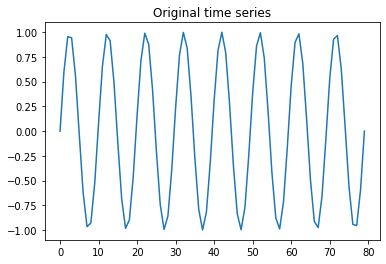

In [26]:
"""
Daily temperatures dataset
"""
series = np.sin(np.linspace(-8 * np.pi, 8 * np.pi, 80))
line(series, title='Original time series')

In [27]:
"""
Chunk time series into smaller windows without overlap
"""
window_size = 8
num_windows = len(series) // window_size
num_samples = window_size * num_windows
w = np.arange(window_size)
t = np.arange(num_samples - window_size + 1)
idx = (w + t.reshape((-1, 1)))

X = series[idx]
Xt, yt = Fourier().fit_transform(X)

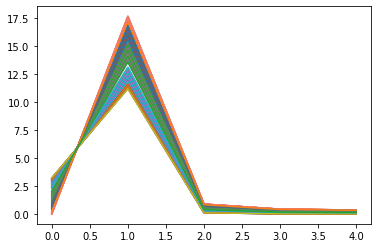

In [29]:
"""
Plot Fourier series
"""
line(*(Xt.tolist()))

In [30]:
"""
Port to C++
"""
print(Fourier().fit(X).port(language='cpp'))

#ifndef UUID5079836824
#define UUID5079836824

namespace EverywhereML {
    namespace Data {
        namespace Preprocessing {
            
                class DFT {
                    public:
                        

                        /**
                         * input_dim  = 8
                         * output_dim = 0
                         */
                        bool transform(float *source) {
                            
    // compute all features in parallel
    float harmonic = 0.7853981633974483;

    

    // optimized case for f=0
    for (uint16_t k = 0, offset = 0; k < 1; k++, offset += 4.0) {
        float sum = 0;

        for (uint16_t i = k; i < 8; i += 1) {
            sum += source[i];
        }

        buffer[offset] = sum;
    }

    for (uint16_t f = 1; f < 4.0; f++) {
        float re[1] = {0};
        float im[1] = {0};

        for (uint16_t i = 0, offset = 0; i < 8; i++, offset += 1) {
            const float harmonic_i = harmonic * i;

     